## problem11 
montecarlo simulation 
(a)calculate df distributon without intercept,which means that simulating t value of coef  $y_{t-1}$  

$\Delta y_t=\gamma y_{t-1}+e_t$


1%         5%        10%        50%        95%       100% 
-3.4923481 -2.8532092 -2.5808102 -1.5619336 -0.1143045  1.6439138

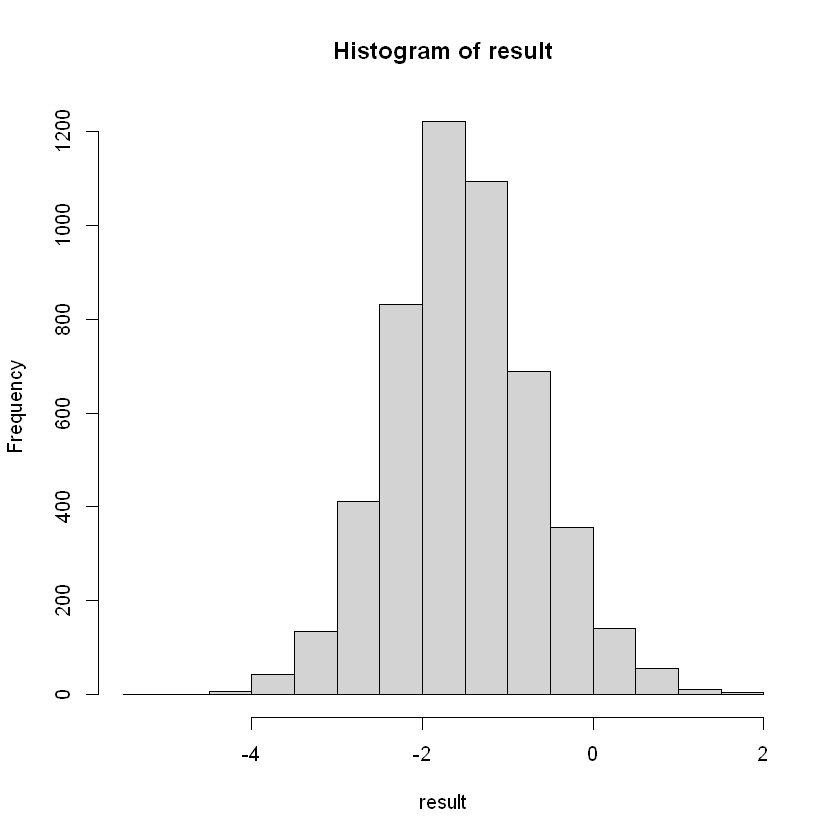

In [19]:
N<-5000

result<-rep(0,N)
for (j in 1:N){
    y<-rep(0,100)
    e<-rnorm(100)
    for (i in 2:100){
        y[i]<-y[i-1]+e[i]
    }
    dy<-diff(y)
    y_lag<-y[1:99]
    
    reg<-lm(dy~y_lag)
    #summary(reg)
    t_value<-summary(reg)$coefficients[2,3]
    result[j]<-t_value
}
#summary(result)
quantile(result,c(0.01,0.05,0.1,0.5,0.95,1))
hist(result)

(b)calculate df distributon with intercept and time trend  

$\Delta y_t=\gamma y_{t-1}+at+e_t$

1%         5%        10%        50%        95%       100% 
-4.0267384 -3.4507389 -3.1489558 -2.1509075 -0.9556928  0.7063737

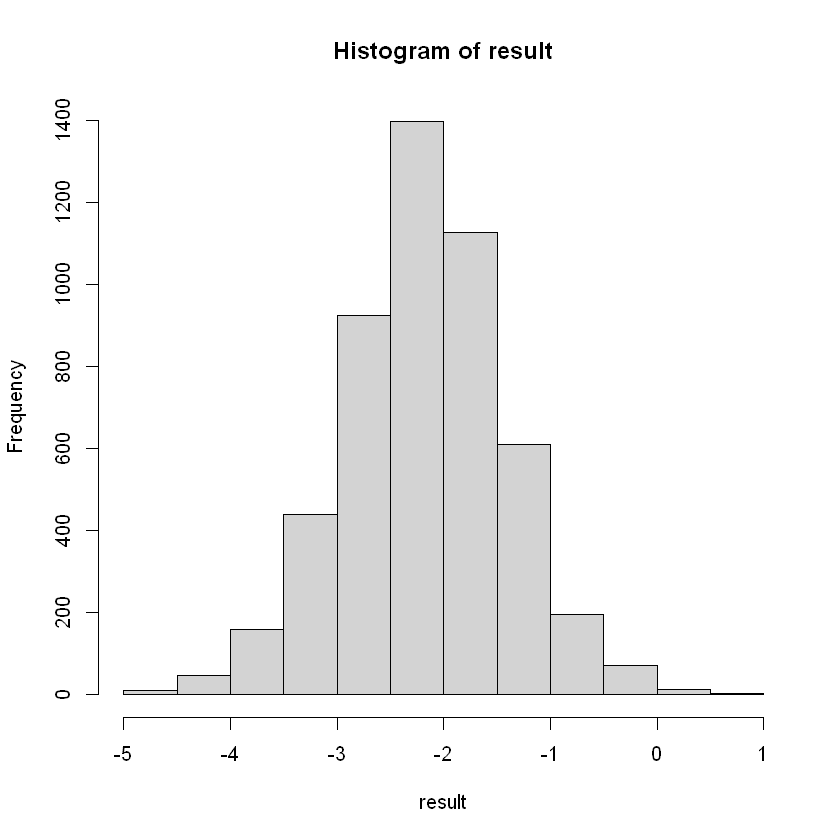

In [22]:
N<-5000
result<-rep(0,N)
for (j in 1:N){
    y<-rep(0,100)
    e<-rnorm(100)
    trend<-1:99
    for (i in 2:100){
        y[i]<-y[i-1]+e[i]
    }
    dy<-diff(y)
    y_lag<-y[1:99]
    
    reg<-lm(dy~y_lag+trend)
    #summary(reg)
    t_value<-summary(reg)$coefficients[2,3]
    result[j]<-t_value
}
#summary(result)
quantile(result,c(0.01,0.05,0.1,0.5,0.95,1))
hist(result)

1%         5%        10%        50%        95%       100% 
-4.0237009 -3.4554359 -3.1326998 -2.1606471 -0.8788961  1.5373201

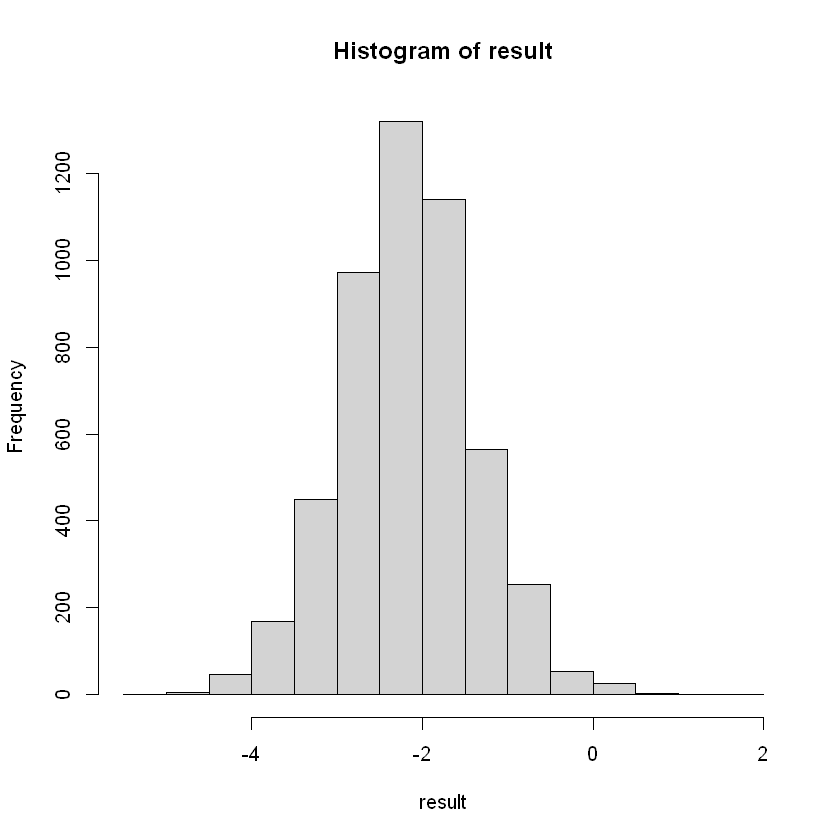

In [23]:
N<-5000
result<-rep(0,N)
for (j in 1:N){
    y<-rep(0,100)
    e<-rnorm(100)
    trend<-1:99
    for (i in 2:100){
        y[i]<-1+y[i-1]+e[i]
    }
    dy<-diff(y)
    y_lag<-y[1:99]
    
    reg<-lm(dy~y_lag+trend)
    #summary(reg)
    t_value<-summary(reg)$coefficients[2,3]
    result[j]<-t_value
}
#summary(result)
quantile(result,c(0.01,0.05,0.1,0.5,0.95,1))
chist(result)

In [10]:
create_ts<-function(coef,size){
     y<-rep(0,size)
    e<-rnorm(size)
    for (i in 2:size){
        y[i]<-coef*y[i-1]+e[i]
    }
    return(y)
}

N<-300
result<-rep(0,N)
coefs<-rep(0,N)
t_values<-rep(0,N)
for (j in 1:N){
    y<-create_ts(0.5,100)
    #print(y)
    y_t<-y[2:100]
    y_lag<-y[1:99]
    reg<-lm(y_t~y_lag)
    print(reg)
    coef_mat<-summary(reg)$coefficients
    #print(coef_mat)
    coefs[j]<-coef_mat[2,1]
    t_values[j]<-coef_mat[2,3]
}
#summary(result)
quantile(coefs,c(0.01,0.05,0.1,0.5,0.95,1))
#hist(result)


Call:
lm(formula = y_t ~ y_lag)

Coefficients:
(Intercept)        y_lag  
   -0.04719      0.48714  


Call:
lm(formula = y_t ~ y_lag)

Coefficients:
(Intercept)        y_lag  
    -0.1234       0.5365  


Call:
lm(formula = y_t ~ y_lag)

Coefficients:
(Intercept)        y_lag  
    0.09582      0.41223  


Call:
lm(formula = y_t ~ y_lag)

Coefficients:
(Intercept)        y_lag  
     0.1024       0.3700  


Call:
lm(formula = y_t ~ y_lag)

Coefficients:
(Intercept)        y_lag  
    -0.2250       0.4375  


Call:
lm(formula = y_t ~ y_lag)

Coefficients:
(Intercept)        y_lag  
    0.08123      0.47257  


Call:
lm(formula = y_t ~ y_lag)

Coefficients:
(Intercept)        y_lag  
    0.09997      0.41303  


Call:
lm(formula = y_t ~ y_lag)

Coefficients:
(Intercept)        y_lag  
   -0.05819      0.55506  


Call:
lm(formula = y_t ~ y_lag)

Coefficients:
(Intercept)        y_lag  
    -0.1036       0.4325  


Call:
lm(formula = y_t ~ y_lag)

Coefficients:
(Intercept)        y_lag 

1%        5%       10%       50%       95%      100% 
0.2761008 0.3513068 0.3784361 0.4924656 0.6337635 0.7007468